# Student Performance Prediction & Learning Analytics
## Machine Learning for Educational Success

**Business Problem:** Educational institutions struggle to identify at-risk students early and provide timely interventions. Many students fail without proper support, leading to dropout and wasted potential.

**Solution:** Build an intelligent analytics platform that predicts student performance based on demographics, family background, study habits, and social factors. Provide early warnings and personalized recommendations.

**Dataset:** 649 students from Portuguese schools with 33 features including grades, study time, family education, and social factors.

**Target Variable:** Final grade (G3) - Scale of 0-20

---
## 1. Import Libraries and Setup

In [1]:
# Data manipulation
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Machine Learning - Preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import mutual_info_regression

# Machine Learning - Models (Regression)
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# Machine Learning - Models (Classification)
from sklearn.linear_model import LogisticRegression as LogisticReg
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Evaluation Metrics
from sklearn.metrics import (mean_squared_error, mean_absolute_error, r2_score,
                             accuracy_score, precision_score, recall_score, f1_score,
                             confusion_matrix, classification_report, roc_auc_score,
                             roc_curve)

# Settings
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
pd.set_option('display.max_columns', None)
np.random.seed(42)

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


---
## 2. Load and Explore Data

In [2]:
# Load dataset
df = pd.read_csv('student-por.csv')

print("="*80)
print("DATASET OVERVIEW")
print("="*80)
print(f"Dataset Shape: {df.shape}")
print(f"Number of Students: {df.shape[0]:,}")
print(f"Number of Features: {df.shape[1]}")
print(f"\nAverage Final Grade (G3): {df['G3'].mean():.2f}")
print(f"Pass Rate (Grade >= 10): {(df['G3'] >= 10).mean()*100:.2f}%")
print(f"Fail Rate (Grade < 10): {(df['G3'] < 10).mean()*100:.2f}%")

df.head(10)

DATASET OVERVIEW
Dataset Shape: (649, 33)
Number of Students: 649
Number of Features: 33

Average Final Grade (G3): 11.91
Pass Rate (Grade >= 10): 84.59%
Fail Rate (Grade < 10): 15.41%


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,no,yes,yes,yes,yes,no,5,4,2,1,2,5,6,12,12,13
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,13,12,13
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,2,10,13,13
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,2,2,1,1,1,0,15,16,17
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,no,yes,yes,yes,yes,no,5,5,1,1,1,5,0,12,12,13


In [3]:
# Dataset information
print("\n" + "="*80)
print("DATASET INFORMATION")
print("="*80)
print(df.info())
print("\n" + "="*80)
print("STATISTICAL SUMMARY")
print("="*80)
df.describe()


DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    o

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [4]:
# Check missing values
print("\n" + "="*80)
print("MISSING VALUES ANALYSIS")
print("="*80)
missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(2)
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_pct
}).sort_values('Percentage', ascending=False)

print(missing_df[missing_df['Percentage'] > 0])

if missing_df['Percentage'].sum() == 0:
    print("\n✅ No missing values found!")


MISSING VALUES ANALYSIS
Empty DataFrame
Columns: [Missing Count, Percentage]
Index: []

✅ No missing values found!


---
## 3. Exploratory Data Analysis (EDA)

### 3.1 Target Variable Distribution

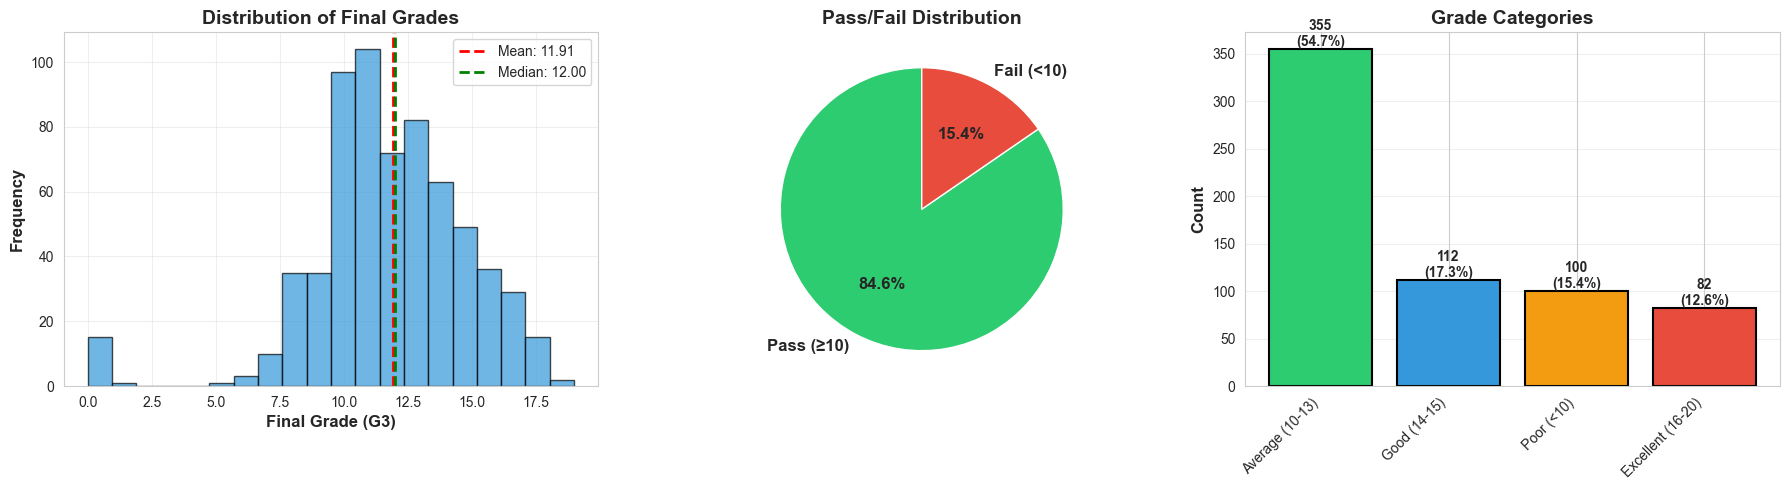

In [5]:
# Final grade distribution
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# Histogram
ax1.hist(df['G3'], bins=20, color='#3498db', edgecolor='black', alpha=0.7)
ax1.axvline(df['G3'].mean(), color='red', linestyle='--', linewidth=2, 
            label=f'Mean: {df["G3"].mean():.2f}')
ax1.axvline(df['G3'].median(), color='green', linestyle='--', linewidth=2,
            label=f'Median: {df["G3"].median():.2f}')
ax1.set_xlabel('Final Grade (G3)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax1.set_title('Distribution of Final Grades', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(alpha=0.3)

# Pass/Fail pie chart
pass_fail = df['G3'].apply(lambda x: 'Pass (≥10)' if x >= 10 else 'Fail (<10)').value_counts()
colors = ['#2ecc71', '#e74c3c']
ax2.pie(pass_fail.values, labels=pass_fail.index, autopct='%1.1f%%', colors=colors,
        startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'})
ax2.set_title('Pass/Fail Distribution', fontsize=14, fontweight='bold')

# Grade categories
def categorize_grade(grade):
    if grade >= 16:
        return 'Excellent (16-20)'
    elif grade >= 14:
        return 'Good (14-15)'
    elif grade >= 10:
        return 'Average (10-13)'
    else:
        return 'Poor (<10)'

grade_categories = df['G3'].apply(categorize_grade).value_counts()
colors_cat = ['#2ecc71', '#3498db', '#f39c12', '#e74c3c']
bars = ax3.bar(range(len(grade_categories)), grade_categories.values, 
               color=colors_cat, edgecolor='black', linewidth=1.5)
ax3.set_xticks(range(len(grade_categories)))
ax3.set_xticklabels(grade_categories.index, rotation=45, ha='right')
ax3.set_ylabel('Count', fontsize=12, fontweight='bold')
ax3.set_title('Grade Categories', fontsize=14, fontweight='bold')
ax3.grid(alpha=0.3, axis='y')

for bar, val in zip(bars, grade_categories.values):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
             f'{val}\n({val/len(df)*100:.1f}%)',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

### 3.2 Grade Progression Analysis

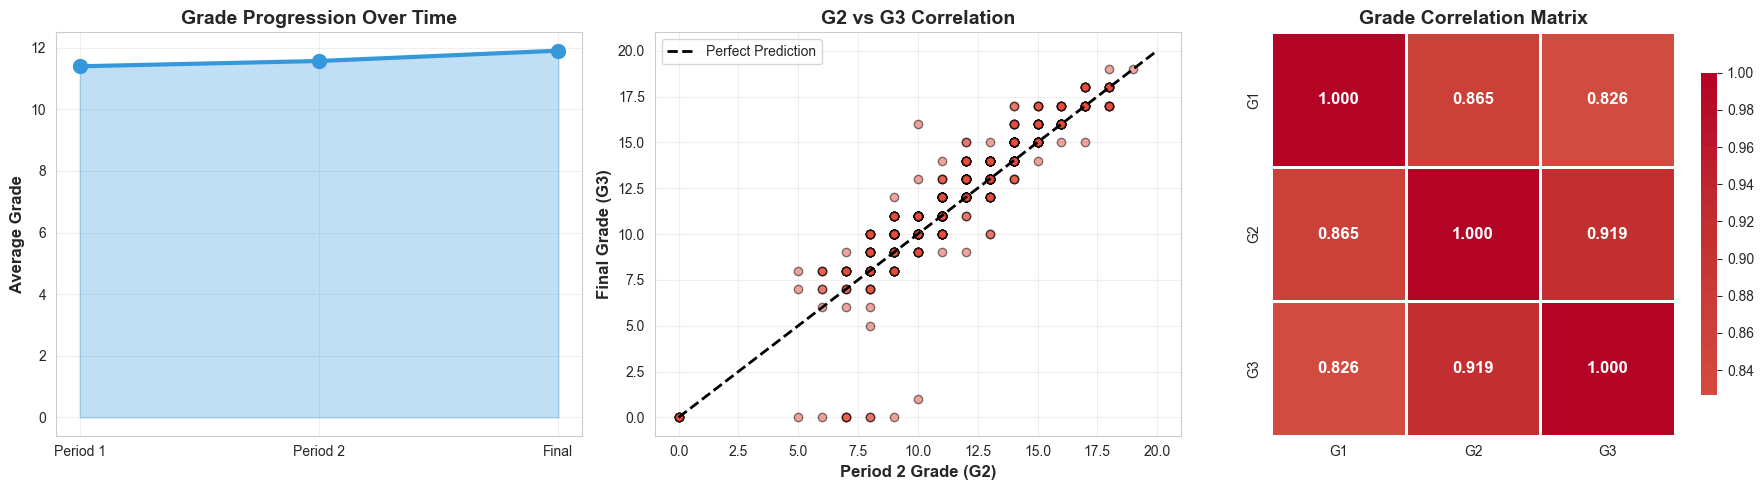


📊 Grade Correlations:
  G1 ↔ G2: 0.865
  G2 ↔ G3: 0.919
  G1 ↔ G3: 0.826


In [6]:
# G1 → G2 → G3 progression
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Grade progression line plot
grade_means = df[['G1', 'G2', 'G3']].mean()
axes[0].plot(['Period 1', 'Period 2', 'Final'], grade_means.values, 
             marker='o', linewidth=3, markersize=10, color='#3498db')
axes[0].fill_between(range(3), grade_means.values, alpha=0.3, color='#3498db')
axes[0].set_ylabel('Average Grade', fontsize=12, fontweight='bold')
axes[0].set_title('Grade Progression Over Time', fontsize=14, fontweight='bold')
axes[0].grid(alpha=0.3)

# G2 vs G3 scatter
axes[1].scatter(df['G2'], df['G3'], alpha=0.5, color='#e74c3c', edgecolors='black')
axes[1].plot([0, 20], [0, 20], 'k--', linewidth=2, label='Perfect Prediction')
axes[1].set_xlabel('Period 2 Grade (G2)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Final Grade (G3)', fontsize=12, fontweight='bold')
axes[1].set_title('G2 vs G3 Correlation', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

# Correlation heatmap
corr_grades = df[['G1', 'G2', 'G3']].corr()
sns.heatmap(corr_grades, annot=True, fmt='.3f', cmap='coolwarm', center=0,
            square=True, linewidths=2, cbar_kws={"shrink": 0.8},
            annot_kws={'fontsize': 12, 'fontweight': 'bold'}, ax=axes[2])
axes[2].set_title('Grade Correlation Matrix', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n📊 Grade Correlations:")
print(f"  G1 ↔ G2: {df['G1'].corr(df['G2']):.3f}")
print(f"  G2 ↔ G3: {df['G2'].corr(df['G3']):.3f}")
print(f"  G1 ↔ G3: {df['G1'].corr(df['G3']):.3f}")

### 3.3 Demographic Analysis

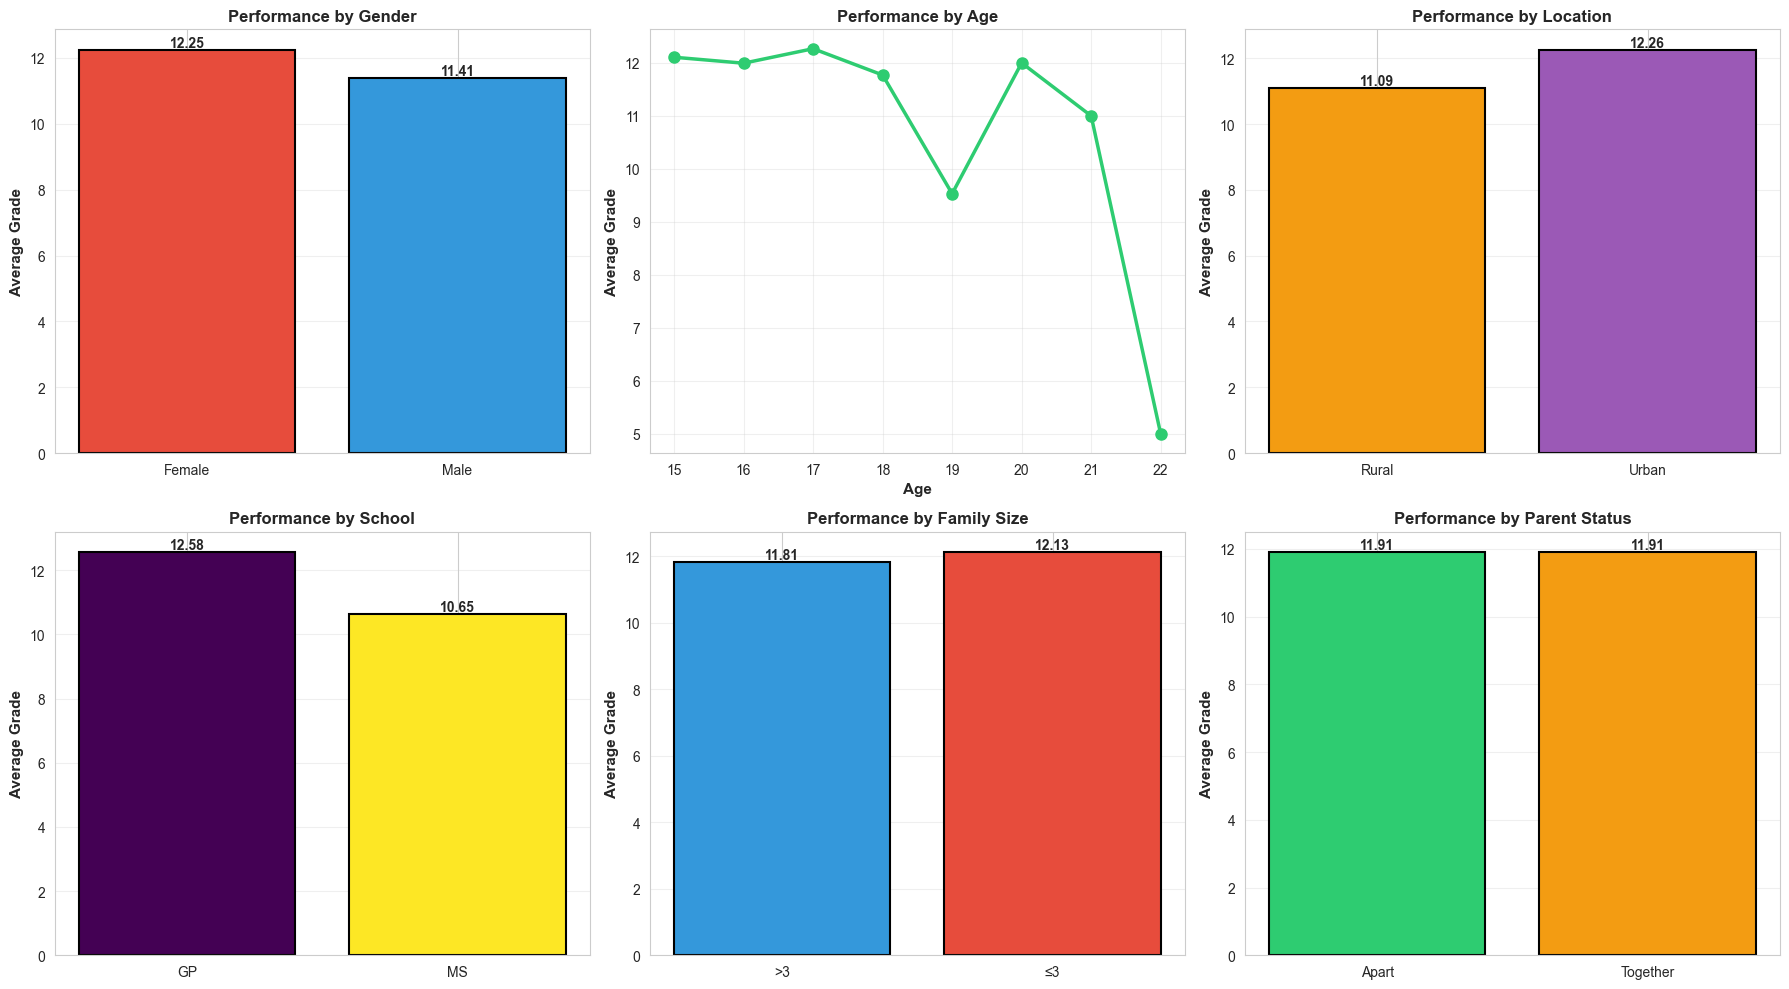

In [7]:
# Performance by demographics
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

# Gender
gender_perf = df.groupby('sex')['G3'].mean().sort_values(ascending=False)
bars = axes[0].bar(range(len(gender_perf)), gender_perf.values, 
                    color=['#e74c3c', '#3498db'], edgecolor='black', linewidth=1.5)
axes[0].set_xticks(range(len(gender_perf)))
axes[0].set_xticklabels(['Female' if x == 'F' else 'Male' for x in gender_perf.index])
axes[0].set_ylabel('Average Grade', fontsize=11, fontweight='bold')
axes[0].set_title('Performance by Gender', fontsize=12, fontweight='bold')
axes[0].grid(alpha=0.3, axis='y')
for bar, val in zip(bars, gender_perf.values):
    axes[0].text(bar.get_x() + bar.get_width()/2., val, f'{val:.2f}',
                 ha='center', va='bottom', fontsize=10, fontweight='bold')

# Age
age_perf = df.groupby('age')['G3'].mean().sort_index()
axes[1].plot(age_perf.index, age_perf.values, marker='o', linewidth=2.5, 
             markersize=8, color='#2ecc71')
axes[1].set_xlabel('Age', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Average Grade', fontsize=11, fontweight='bold')
axes[1].set_title('Performance by Age', fontsize=12, fontweight='bold')
axes[1].grid(alpha=0.3)

# Address (Urban/Rural)
address_perf = df.groupby('address')['G3'].mean()
bars = axes[2].bar(range(len(address_perf)), address_perf.values,
                    color=['#f39c12', '#9b59b6'], edgecolor='black', linewidth=1.5)
axes[2].set_xticks(range(len(address_perf)))
axes[2].set_xticklabels(['Rural' if x == 'R' else 'Urban' for x in address_perf.index])
axes[2].set_ylabel('Average Grade', fontsize=11, fontweight='bold')
axes[2].set_title('Performance by Location', fontsize=12, fontweight='bold')
axes[2].grid(alpha=0.3, axis='y')
for bar, val in zip(bars, address_perf.values):
    axes[2].text(bar.get_x() + bar.get_width()/2., val, f'{val:.2f}',
                 ha='center', va='bottom', fontsize=10, fontweight='bold')

# School
school_perf = df.groupby('school')['G3'].mean()
bars = axes[3].bar(range(len(school_perf)), school_perf.values,
                    color=plt.cm.viridis(np.linspace(0, 1, len(school_perf))),
                    edgecolor='black', linewidth=1.5)
axes[3].set_xticks(range(len(school_perf)))
axes[3].set_xticklabels(school_perf.index)
axes[3].set_ylabel('Average Grade', fontsize=11, fontweight='bold')
axes[3].set_title('Performance by School', fontsize=12, fontweight='bold')
axes[3].grid(alpha=0.3, axis='y')
for bar, val in zip(bars, school_perf.values):
    axes[3].text(bar.get_x() + bar.get_width()/2., val, f'{val:.2f}',
                 ha='center', va='bottom', fontsize=10, fontweight='bold')

# Family size
famsize_perf = df.groupby('famsize')['G3'].mean()
bars = axes[4].bar(range(len(famsize_perf)), famsize_perf.values,
                    color=['#3498db', '#e74c3c'], edgecolor='black', linewidth=1.5)
axes[4].set_xticks(range(len(famsize_perf)))
axes[4].set_xticklabels(['≤3' if x == 'LE3' else '>3' for x in famsize_perf.index])
axes[4].set_ylabel('Average Grade', fontsize=11, fontweight='bold')
axes[4].set_title('Performance by Family Size', fontsize=12, fontweight='bold')
axes[4].grid(alpha=0.3, axis='y')
for bar, val in zip(bars, famsize_perf.values):
    axes[4].text(bar.get_x() + bar.get_width()/2., val, f'{val:.2f}',
                 ha='center', va='bottom', fontsize=10, fontweight='bold')

# Parent status
pstatus_perf = df.groupby('Pstatus')['G3'].mean()
bars = axes[5].bar(range(len(pstatus_perf)), pstatus_perf.values,
                    color=['#2ecc71', '#f39c12'], edgecolor='black', linewidth=1.5)
axes[5].set_xticks(range(len(pstatus_perf)))
axes[5].set_xticklabels(['Apart' if x == 'A' else 'Together' for x in pstatus_perf.index])
axes[5].set_ylabel('Average Grade', fontsize=11, fontweight='bold')
axes[5].set_title('Performance by Parent Status', fontsize=12, fontweight='bold')
axes[5].grid(alpha=0.3, axis='y')
for bar, val in zip(bars, pstatus_perf.values):
    axes[5].text(bar.get_x() + bar.get_width()/2., val, f'{val:.2f}',
                 ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

### 3.4 Parental Education Impact

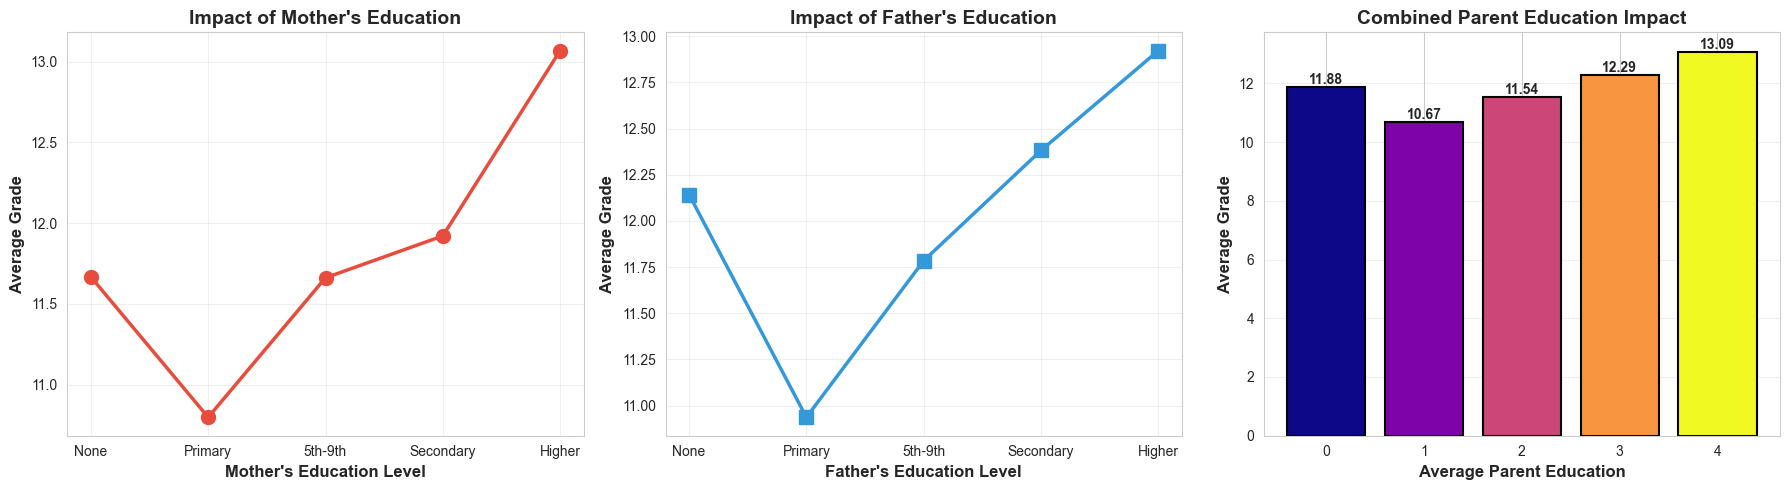

In [8]:
# Parental education analysis
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# Mother's education
medu_perf = df.groupby('Medu')['G3'].mean()
ax1.plot(medu_perf.index, medu_perf.values, marker='o', linewidth=2.5,
         markersize=10, color='#e74c3c')
ax1.set_xlabel("Mother's Education Level", fontsize=12, fontweight='bold')
ax1.set_ylabel('Average Grade', fontsize=12, fontweight='bold')
ax1.set_title("Impact of Mother's Education", fontsize=14, fontweight='bold')
ax1.set_xticks(range(5))
ax1.set_xticklabels(['None', 'Primary', '5th-9th', 'Secondary', 'Higher'])
ax1.grid(alpha=0.3)

# Father's education
fedu_perf = df.groupby('Fedu')['G3'].mean()
ax2.plot(fedu_perf.index, fedu_perf.values, marker='s', linewidth=2.5,
         markersize=10, color='#3498db')
ax2.set_xlabel("Father's Education Level", fontsize=12, fontweight='bold')
ax2.set_ylabel('Average Grade', fontsize=12, fontweight='bold')
ax2.set_title("Impact of Father's Education", fontsize=14, fontweight='bold')
ax2.set_xticks(range(5))
ax2.set_xticklabels(['None', 'Primary', '5th-9th', 'Secondary', 'Higher'])
ax2.grid(alpha=0.3)

# Combined parent education
df['parent_edu_avg'] = (df['Medu'] + df['Fedu']) / 2
parent_edu_perf = df.groupby(df['parent_edu_avg'].round())['G3'].mean()
bars = ax3.bar(range(len(parent_edu_perf)), parent_edu_perf.values,
               color=plt.cm.plasma(np.linspace(0, 1, len(parent_edu_perf))),
               edgecolor='black', linewidth=1.5)
ax3.set_xticks(range(len(parent_edu_perf)))
ax3.set_xticklabels(parent_edu_perf.index.astype(int))
ax3.set_xlabel('Average Parent Education', fontsize=12, fontweight='bold')
ax3.set_ylabel('Average Grade', fontsize=12, fontweight='bold')
ax3.set_title('Combined Parent Education Impact', fontsize=14, fontweight='bold')
ax3.grid(alpha=0.3, axis='y')
for bar, val in zip(bars, parent_edu_perf.values):
    ax3.text(bar.get_x() + bar.get_width()/2., val, f'{val:.2f}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

### 3.5 Study Habits Analysis

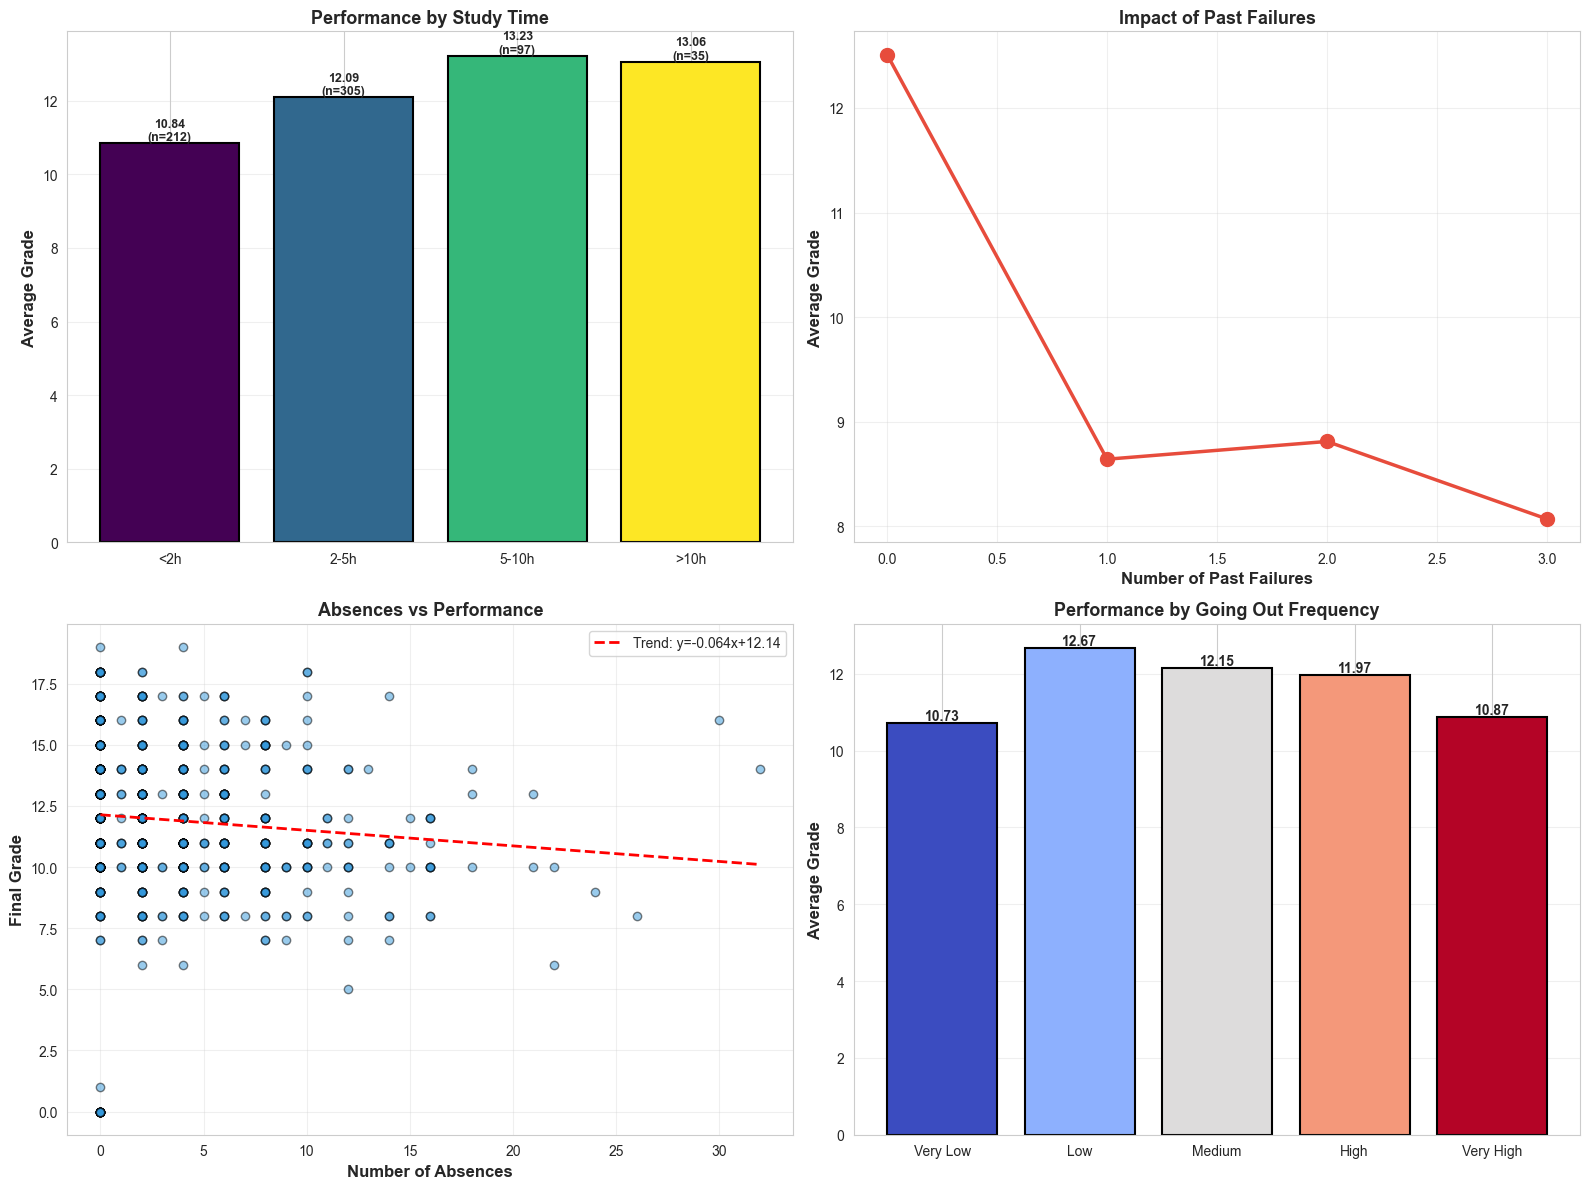

In [9]:
# Study habits and performance
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Study time
studytime_perf = df.groupby('studytime')['G3'].agg(['mean', 'count'])
ax1 = axes[0, 0]
bars = ax1.bar(range(len(studytime_perf)), studytime_perf['mean'],
               color=plt.cm.viridis(np.linspace(0, 1, len(studytime_perf))),
               edgecolor='black', linewidth=1.5)
ax1.set_xticks(range(len(studytime_perf)))
ax1.set_xticklabels(['<2h', '2-5h', '5-10h', '>10h'])
ax1.set_ylabel('Average Grade', fontsize=12, fontweight='bold')
ax1.set_title('Performance by Study Time', fontsize=13, fontweight='bold')
ax1.grid(alpha=0.3, axis='y')
for i, (bar, val, count) in enumerate(zip(bars, studytime_perf['mean'], studytime_perf['count'])):
    ax1.text(bar.get_x() + bar.get_width()/2., val,
             f'{val:.2f}\n(n={count})', ha='center', va='bottom', fontsize=9, fontweight='bold')

# Failures impact
failures_perf = df.groupby('failures')['G3'].mean()
ax2 = axes[0, 1]
ax2.plot(failures_perf.index, failures_perf.values, marker='o', linewidth=2.5,
         markersize=10, color='#e74c3c')
ax2.set_xlabel('Number of Past Failures', fontsize=12, fontweight='bold')
ax2.set_ylabel('Average Grade', fontsize=12, fontweight='bold')
ax2.set_title('Impact of Past Failures', fontsize=13, fontweight='bold')
ax2.grid(alpha=0.3)

# Absences vs Grade scatter
ax3 = axes[1, 0]
ax3.scatter(df['absences'], df['G3'], alpha=0.5, color='#3498db', edgecolors='black')
z = np.polyfit(df['absences'], df['G3'], 1)
p = np.poly1d(z)
ax3.plot(df['absences'].sort_values(), p(df['absences'].sort_values()),
         "r--", linewidth=2, label=f'Trend: y={z[0]:.3f}x+{z[1]:.2f}')
ax3.set_xlabel('Number of Absences', fontsize=12, fontweight='bold')
ax3.set_ylabel('Final Grade', fontsize=12, fontweight='bold')
ax3.set_title('Absences vs Performance', fontsize=13, fontweight='bold')
ax3.legend()
ax3.grid(alpha=0.3)

# Going out frequency
goout_perf = df.groupby('goout')['G3'].mean()
ax4 = axes[1, 1]
bars = ax4.bar(range(len(goout_perf)), goout_perf.values,
               color=plt.cm.coolwarm(np.linspace(0, 1, len(goout_perf))),
               edgecolor='black', linewidth=1.5)
ax4.set_xticks(range(len(goout_perf)))
ax4.set_xticklabels(['Very Low', 'Low', 'Medium', 'High', 'Very High'])
ax4.set_ylabel('Average Grade', fontsize=12, fontweight='bold')
ax4.set_title('Performance by Going Out Frequency', fontsize=13, fontweight='bold')
ax4.grid(alpha=0.3, axis='y')
for bar, val in zip(bars, goout_perf.values):
    ax4.text(bar.get_x() + bar.get_width()/2., val, f'{val:.2f}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

### 3.6 Support Systems Analysis

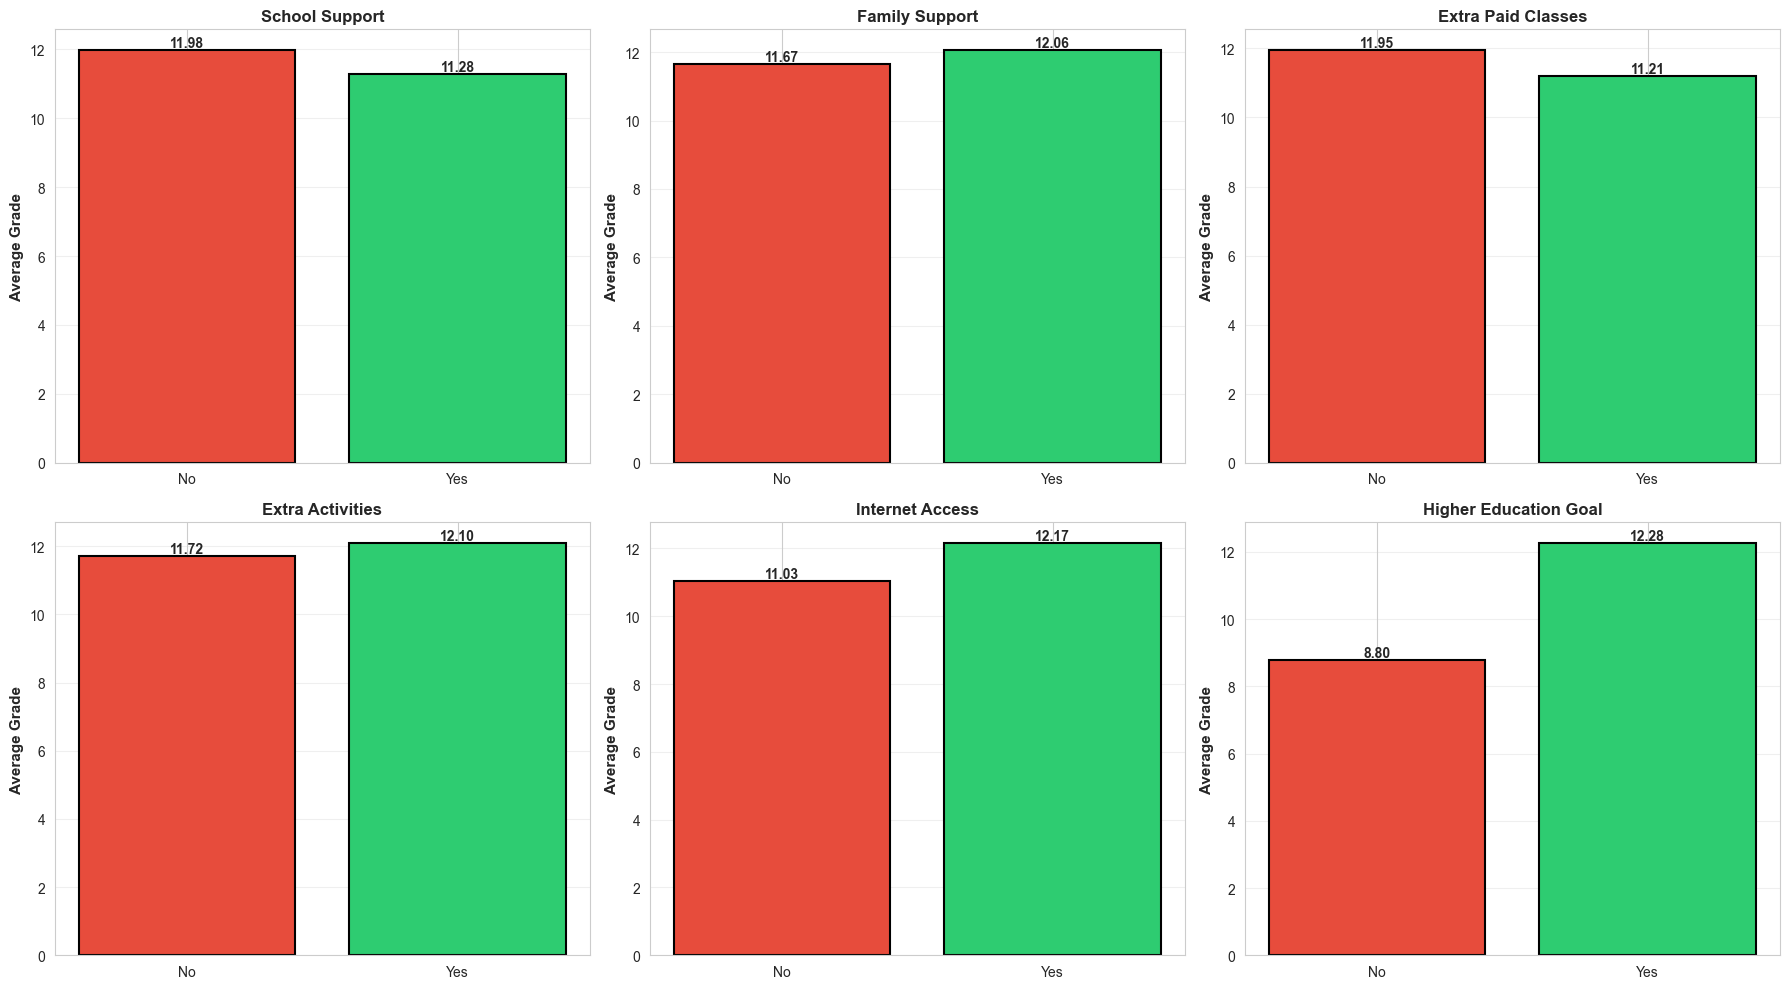

In [10]:
# Support systems impact
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

support_features = ['schoolsup', 'famsup', 'paid', 'activities', 'internet', 'higher']
titles = ['School Support', 'Family Support', 'Extra Paid Classes', 
          'Extra Activities', 'Internet Access', 'Higher Education Goal']

for idx, (feature, title) in enumerate(zip(support_features, titles)):
    ax = axes[idx]
    support_perf = df.groupby(feature)['G3'].mean()
    colors_map = {True: '#2ecc71', False: '#e74c3c', 'yes': '#2ecc71', 'no': '#e74c3c'}
    colors = [colors_map.get(x, '#3498db') for x in support_perf.index]
    
    bars = ax.bar(range(len(support_perf)), support_perf.values, color=colors,
                   edgecolor='black', linewidth=1.5)
    ax.set_xticks(range(len(support_perf)))
    ax.set_xticklabels(['Yes' if str(x) == 'yes' else 'No' for x in support_perf.index])
    ax.set_ylabel('Average Grade', fontsize=11, fontweight='bold')
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.grid(alpha=0.3, axis='y')
    
    for bar, val in zip(bars, support_perf.values):
        ax.text(bar.get_x() + bar.get_width()/2., val, f'{val:.2f}',
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

---
## 4. Feature Engineering

In [11]:
# Create engineered features
df_engineered = df.copy()

# Parent education average
df_engineered['parent_edu_avg'] = (df_engineered['Medu'] + df_engineered['Fedu']) / 2
df_engineered['parent_edu_max'] = df_engineered[['Medu', 'Fedu']].max(axis=1)

# Alcohol consumption average
df_engineered['alc_avg'] = (df_engineered['Dalc'] + df_engineered['Walc']) / 2

# Social activity score
df_engineered['social_score'] = (df_engineered['goout'] + df_engineered['freetime'] + 
                                   df_engineered['romantic'].map({'yes': 1, 'no': 0})) / 3

# Support score
df_engineered['support_score'] = (df_engineered['schoolsup'].map({'yes': 1, 'no': 0}) +
                                   df_engineered['famsup'].map({'yes': 1, 'no': 0}) +
                                   df_engineered['paid'].map({'yes': 1, 'no': 0})) / 3

# Grade improvement from G1 to G2
df_engineered['grade_improvement'] = df_engineered['G2'] - df_engineered['G1']

# At-risk indicator
df_engineered['at_risk'] = ((df_engineered['failures'] > 0) | 
                             (df_engineered['absences'] > 10) | 
                             (df_engineered['G2'] < 10)).astype(int)

# Study efficiency (grade / studytime)
df_engineered['study_efficiency'] = df_engineered['G2'] / (df_engineered['studytime'] + 1)

print("="*80)
print("NEW ENGINEERED FEATURES")
print("="*80)
new_features = ['parent_edu_avg', 'alc_avg', 'social_score', 'support_score',
                'grade_improvement', 'study_efficiency']
print(df_engineered[new_features].describe())

print("\n✅ Feature engineering completed!")

NEW ENGINEERED FEATURES
       parent_edu_avg     alc_avg  social_score  support_score  \
count      649.000000  649.000000    649.000000     649.000000   
mean         2.410632    1.891371      2.244479       0.259373   
std          1.014035    0.996206      0.632738       0.220693   
min          0.000000    1.000000      0.666667       0.000000   
25%          1.500000    1.000000      1.666667       0.000000   
50%          2.500000    1.500000      2.333333       0.333333   
75%          3.000000    2.500000      2.666667       0.333333   
max          4.000000    5.000000      3.666667       1.000000   

       grade_improvement  study_efficiency  
count         649.000000        649.000000  
mean            0.171032          4.189240  
std             1.479289          1.383305  
min            -9.000000          0.000000  
25%            -1.000000          3.333333  
50%             0.000000          4.000000  
75%             1.000000          5.000000  
max            11.000

---
## 5. Data Preprocessing

In [12]:
# Encode categorical variables
df_processed = df_engineered.copy()

# Label encoding for binary variables
binary_cols = ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
for col in binary_cols:
    df_processed[col] = df_processed[col].map({'yes': 1, 'no': 0})

# Label encoding for other categorical variables
label_encoders = {}
categorical_cols = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 
                    'reason', 'guardian']

for col in categorical_cols:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col])
    label_encoders[col] = le

print("="*80)
print("ENCODING COMPLETED")
print("="*80)
print(f"Binary variables encoded: {len(binary_cols)}")
print(f"Categorical variables encoded: {len(categorical_cols)}")
print("\n✅ All categorical variables encoded!")

ENCODING COMPLETED
Binary variables encoded: 8
Categorical variables encoded: 9

✅ All categorical variables encoded!


---
## 6. Feature Selection

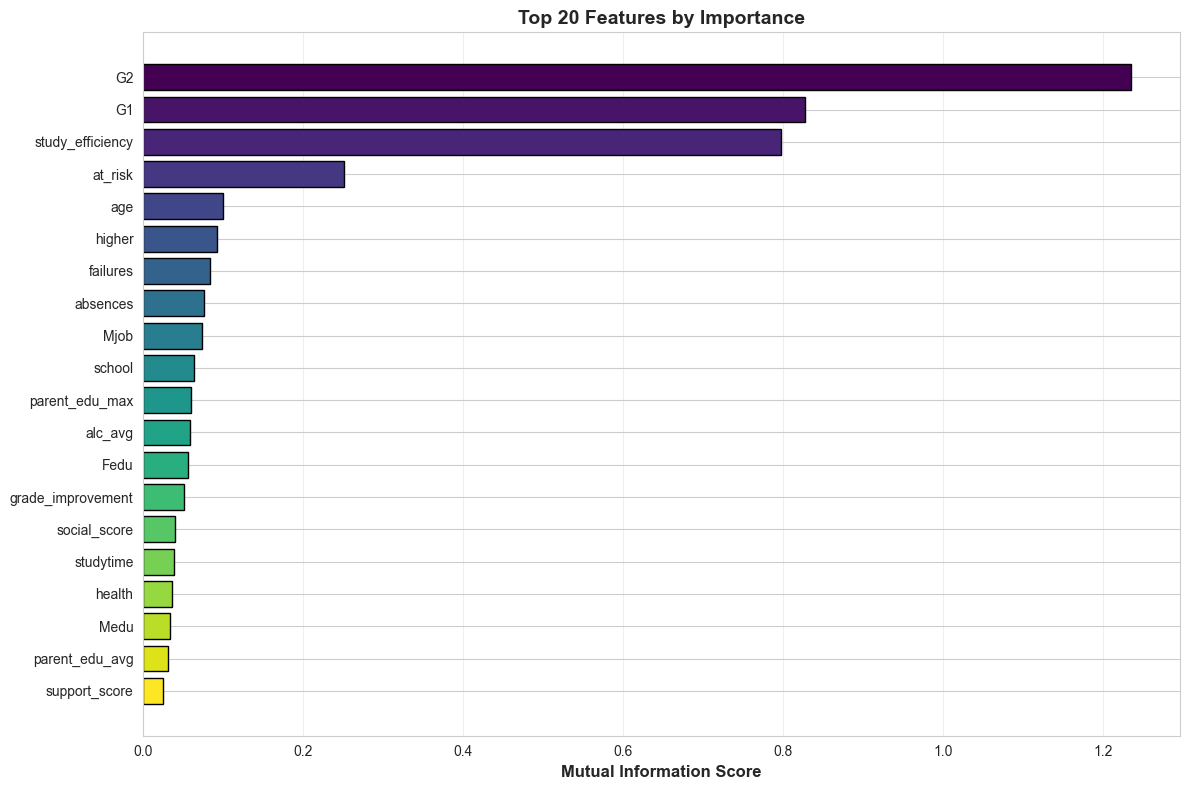


TOP 15 MOST IMPORTANT FEATURES
G2                   1.234348
G1                   0.827375
study_efficiency     0.796646
at_risk              0.250499
age                  0.099922
higher               0.092480
failures             0.083458
absences             0.075853
Mjob                 0.072828
school               0.063473
parent_edu_max       0.059409
alc_avg              0.058229
Fedu                 0.056129
grade_improvement    0.051248
social_score         0.040148
dtype: float64


In [13]:
# Prepare features and target
X = df_processed.drop(['G3'], axis=1)
y = df_processed['G3']

# Calculate mutual information scores
mi_scores = mutual_info_regression(X, y, random_state=42)
mi_scores = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

# Visualize top 20 features
plt.figure(figsize=(12, 8))
top_20 = mi_scores.head(20)
colors = plt.cm.viridis(np.linspace(0, 1, len(top_20)))
bars = plt.barh(range(len(top_20)), top_20.values, color=colors, 
                edgecolor='black', linewidth=1)
plt.yticks(range(len(top_20)), top_20.index)
plt.xlabel('Mutual Information Score', fontsize=12, fontweight='bold')
plt.title('Top 20 Features by Importance', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("TOP 15 MOST IMPORTANT FEATURES")
print("="*80)
print(mi_scores.head(15))

---
## 7. Train-Test Split and Scaling

In [14]:
# Split data (70-30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("="*80)
print("DATA SPLIT")
print("="*80)
print(f"Training set: {X_train.shape[0]:,} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Test set: {X_test.shape[0]:,} samples ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"\nTraining set average grade: {y_train.mean():.2f}")
print(f"Test set average grade: {y_test.mean():.2f}")

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n✅ Data split and scaled successfully!")

DATA SPLIT
Training set: 454 samples (70.0%)
Test set: 195 samples (30.0%)

Training set average grade: 11.83
Test set average grade: 12.09

✅ Data split and scaled successfully!


---
## 8. Regression Models Training

In [15]:
# Define regression models
regression_models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0, random_state=42),
    'Lasso Regression': Lasso(alpha=0.1, random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42, max_depth=10),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, max_depth=15),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42, learning_rate=0.1)
}

# Train and evaluate regression models
regression_results = []

print("\n" + "="*80)
print("REGRESSION MODEL TRAINING")
print("="*80)

for model_name, model in regression_models.items():
    print(f"\nTraining {model_name}...")
    
    # Train model
    model.fit(X_train_scaled, y_train)
    
    # Predictions
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)
    
    # Calculate metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    train_mae = mean_absolute_error(y_train, y_pred_train)
    test_mae = mean_absolute_error(y_test, y_pred_test)
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    
    # Store results
    regression_results.append({
        'Model': model_name,
        'Train RMSE': train_rmse,
        'Test RMSE': test_rmse,
        'Train MAE': train_mae,
        'Test MAE': test_mae,
        'Train R²': train_r2,
        'Test R²': test_r2
    })
    
    print(f"  ✓ Completed - Test R²: {test_r2:.4f}, Test RMSE: {test_rmse:.4f}")

# Create results dataframe
regression_results_df = pd.DataFrame(regression_results).sort_values('Test R²', ascending=False)
print("\n" + "="*80)
print("REGRESSION MODEL COMPARISON")
print("="*80)
print(regression_results_df.to_string(index=False))

print("\n✅ All regression models trained!")


REGRESSION MODEL TRAINING

Training Linear Regression...
  ✓ Completed - Test R²: 0.8675, Test RMSE: 1.2105

Training Ridge Regression...
  ✓ Completed - Test R²: 0.8678, Test RMSE: 1.2089

Training Lasso Regression...
  ✓ Completed - Test R²: 0.8824, Test RMSE: 1.1405

Training Decision Tree...
  ✓ Completed - Test R²: 0.7735, Test RMSE: 1.5826

Training Random Forest...
  ✓ Completed - Test R²: 0.8637, Test RMSE: 1.2277

Training Gradient Boosting...
  ✓ Completed - Test R²: 0.8784, Test RMSE: 1.1597

Training XGBoost...
  ✓ Completed - Test R²: 0.8637, Test RMSE: 1.2277

Training Gradient Boosting...
  ✓ Completed - Test R²: 0.8784, Test RMSE: 1.1597

Training XGBoost...
  ✓ Completed - Test R²: 0.8381, Test RMSE: 1.3382

REGRESSION MODEL COMPARISON
            Model  Train RMSE  Test RMSE  Train MAE  Test MAE  Train R²  Test R²
 Lasso Regression    1.297873   1.140497   0.796010  0.717920  0.833650 0.882373
Gradient Boosting    0.633720   1.159715   0.480197  0.710700  0.960340 0.

---
## 9. Classification Models (Grade Categories)

In [16]:
# Create grade categories for classification
y_class = df_processed['G3'].apply(categorize_grade)
y_class_encoded = LabelEncoder().fit_transform(y_class)

# Split data for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X, y_class_encoded, test_size=0.3, random_state=42, stratify=y_class_encoded)

# Scale features
X_train_class_scaled = scaler.fit_transform(X_train_class)
X_test_class_scaled = scaler.transform(X_test_class)

# Define classification models
classification_models = {
    'Logistic Regression': LogisticReg(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=10),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(n_estimators=100, random_state=42, eval_metric='mlogloss')
}

# Train and evaluate classification models
classification_results = []

print("\n" + "="*80)
print("CLASSIFICATION MODEL TRAINING")
print("="*80)

for model_name, model in classification_models.items():
    print(f"\nTraining {model_name}...")
    
    # Train model
    model.fit(X_train_class_scaled, y_train_class)
    
    # Predictions
    y_pred = model.predict(X_test_class_scaled)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test_class, y_pred)
    precision = precision_score(y_test_class, y_pred, average='weighted')
    recall = recall_score(y_test_class, y_pred, average='weighted')
    f1 = f1_score(y_test_class, y_pred, average='weighted')
    
    # Store results
    classification_results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })
    
    print(f"  ✓ Completed - Accuracy: {accuracy:.4f}")

# Create results dataframe
classification_results_df = pd.DataFrame(classification_results).sort_values('Accuracy', ascending=False)
print("\n" + "="*80)
print("CLASSIFICATION MODEL COMPARISON")
print("="*80)
print(classification_results_df.to_string(index=False))

print("\n✅ All classification models trained!")


CLASSIFICATION MODEL TRAINING

Training Logistic Regression...
  ✓ Completed - Accuracy: 0.7590

Training Decision Tree...
  ✓ Completed - Accuracy: 0.7333

Training Random Forest...
  ✓ Completed - Accuracy: 0.8256

Training Gradient Boosting...
  ✓ Completed - Accuracy: 0.8256

Training Gradient Boosting...
  ✓ Completed - Accuracy: 0.7897

Training XGBoost...
  ✓ Completed - Accuracy: 0.7795

CLASSIFICATION MODEL COMPARISON
              Model  Accuracy  Precision   Recall  F1-Score
      Random Forest  0.825641   0.826363 0.825641  0.806490
  Gradient Boosting  0.789744   0.778129 0.789744  0.776584
            XGBoost  0.779487   0.767546 0.779487  0.767973
Logistic Regression  0.758974   0.749706 0.758974  0.748773
      Decision Tree  0.733333   0.736967 0.733333  0.734206

✅ All classification models trained!
  ✓ Completed - Accuracy: 0.7897

Training XGBoost...
  ✓ Completed - Accuracy: 0.7795

CLASSIFICATION MODEL COMPARISON
              Model  Accuracy  Precision   Recall 

---
## 10. Model Evaluation Visualizations

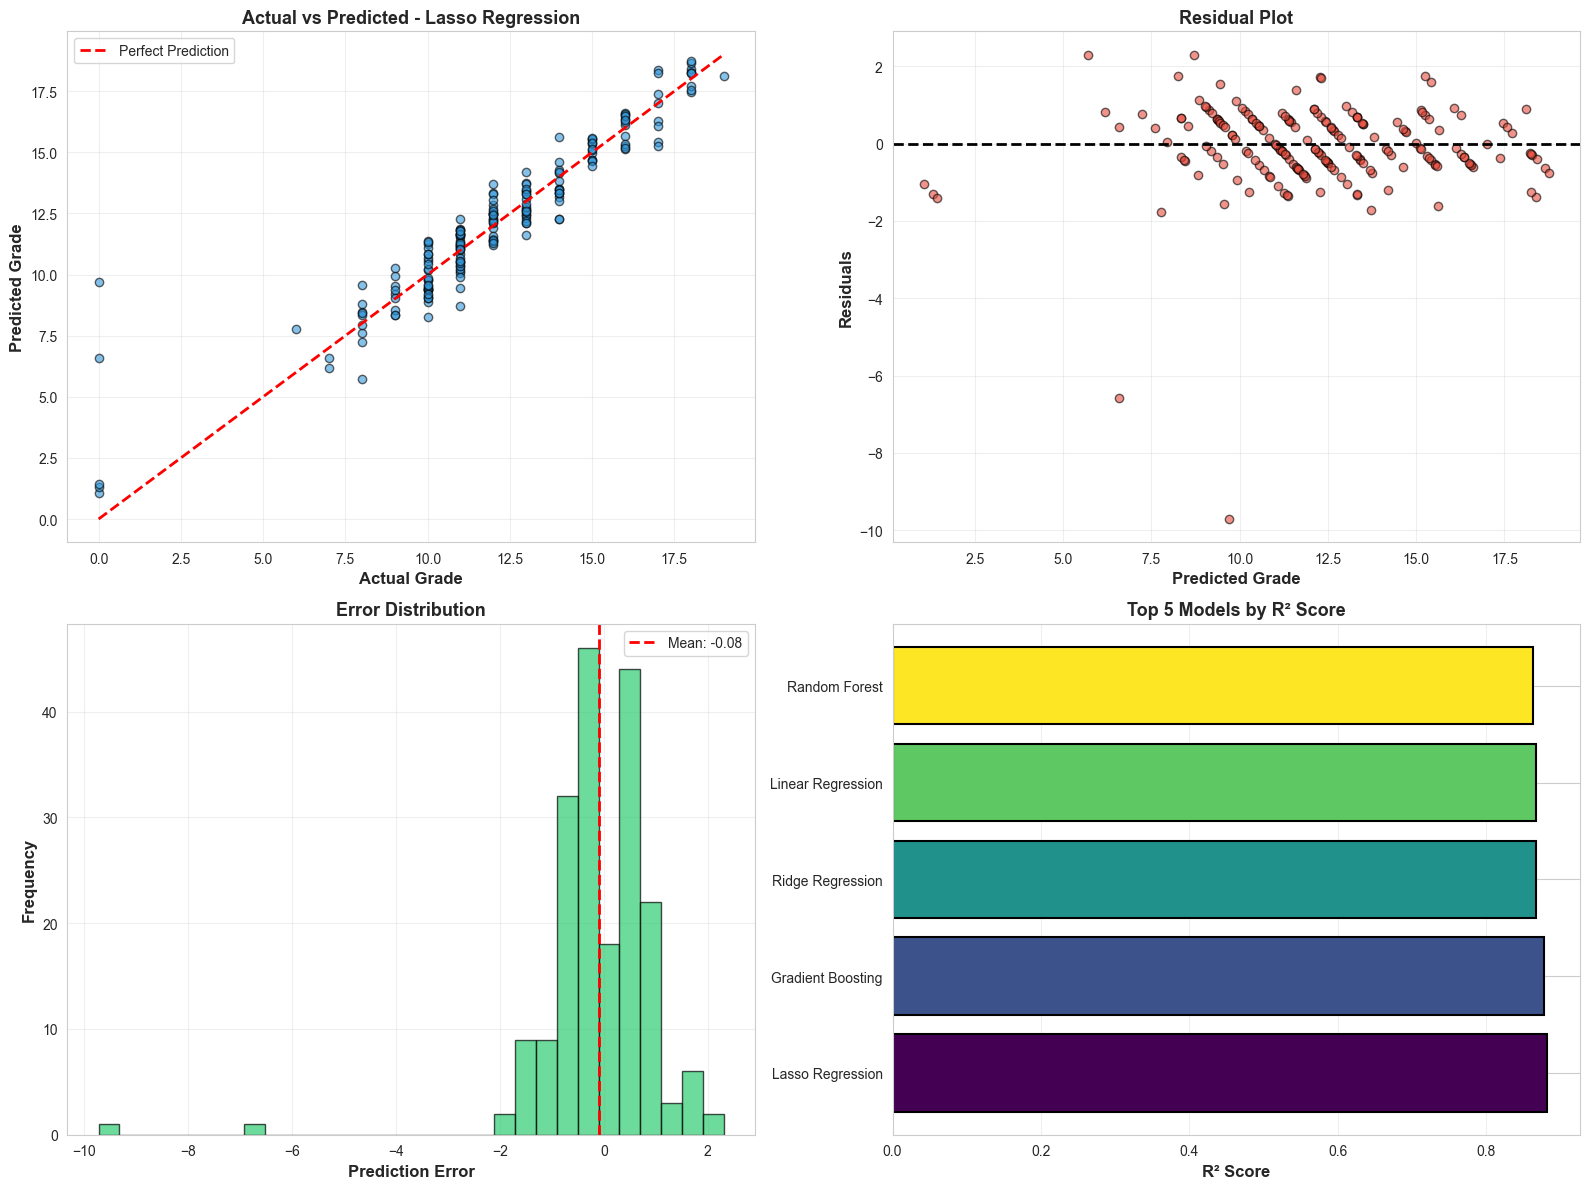


🏆 Best Regression Model: Lasso Regression
   Test R²: 0.8824
   Test RMSE: 1.1405
   Test MAE: 0.7179


In [17]:
# Get best regression model
best_reg_model_name = regression_results_df.iloc[0]['Model']
best_reg_model = regression_models[best_reg_model_name]
y_pred_best = best_reg_model.predict(X_test_scaled)

# Evaluation plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Actual vs Predicted
axes[0, 0].scatter(y_test, y_pred_best, alpha=0.6, color='#3498db', edgecolors='black')
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
                'r--', linewidth=2, label='Perfect Prediction')
axes[0, 0].set_xlabel('Actual Grade', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Predicted Grade', fontsize=12, fontweight='bold')
axes[0, 0].set_title(f'Actual vs Predicted - {best_reg_model_name}', fontsize=13, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Residuals plot
residuals = y_test - y_pred_best
axes[0, 1].scatter(y_pred_best, residuals, alpha=0.6, color='#e74c3c', edgecolors='black')
axes[0, 1].axhline(y=0, color='black', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel('Predicted Grade', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Residuals', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Residual Plot', fontsize=13, fontweight='bold')
axes[0, 1].grid(alpha=0.3)

# Error distribution
axes[1, 0].hist(residuals, bins=30, color='#2ecc71', edgecolor='black', alpha=0.7)
axes[1, 0].axvline(residuals.mean(), color='red', linestyle='--', linewidth=2,
                    label=f'Mean: {residuals.mean():.2f}')
axes[1, 0].set_xlabel('Prediction Error', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Error Distribution', fontsize=13, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# Model comparison
metrics_to_plot = regression_results_df.nsmallest(5, 'Test RMSE')
x_pos = np.arange(len(metrics_to_plot))
axes[1, 1].barh(x_pos, metrics_to_plot['Test R²'],
                color=plt.cm.viridis(np.linspace(0, 1, len(metrics_to_plot))),
                edgecolor='black', linewidth=1.5)
axes[1, 1].set_yticks(x_pos)
axes[1, 1].set_yticklabels(metrics_to_plot['Model'])
axes[1, 1].set_xlabel('R² Score', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Top 5 Models by R² Score', fontsize=13, fontweight='bold')
axes[1, 1].grid(alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

print(f"\n🏆 Best Regression Model: {best_reg_model_name}")
print(f"   Test R²: {regression_results_df.iloc[0]['Test R²']:.4f}")
print(f"   Test RMSE: {regression_results_df.iloc[0]['Test RMSE']:.4f}")
print(f"   Test MAE: {regression_results_df.iloc[0]['Test MAE']:.4f}")

---
## 11. Feature Importance Analysis

In [18]:
# Feature importance for Random Forest (top model)
if best_reg_model_name in ['Random Forest', 'Gradient Boosting', 'XGBoost', 'Decision Tree']:
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': best_reg_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    # Plot top 20 features
    plt.figure(figsize=(12, 8))
    top_20_imp = feature_importance.head(20)
    colors = plt.cm.plasma(np.linspace(0, 1, len(top_20_imp)))
    
    bars = plt.barh(range(len(top_20_imp)), top_20_imp['Importance'], 
                    color=colors, edgecolor='black', linewidth=1)
    plt.yticks(range(len(top_20_imp)), top_20_imp['Feature'])
    plt.xlabel('Importance Score', fontsize=12, fontweight='bold')
    plt.title(f'Top 20 Feature Importance - {best_reg_model_name}', 
              fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.grid(alpha=0.3, axis='x')
    plt.tight_layout()
    plt.show()
    
    print("\n" + "="*80)
    print("TOP 10 MOST IMPORTANT FEATURES")
    print("="*80)
    print(feature_importance.head(10).to_string(index=False))

---
## 12. Save Models and Artifacts

In [19]:
import pickle

# Save best regression model
with open('best_student_model.pkl', 'wb') as f:
    pickle.dump(best_reg_model, f)

# Save scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Save label encoders
with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)

# Save feature names
with open('feature_names.pkl', 'wb') as f:
    pickle.dump(list(X.columns), f)

# Save model results
regression_results_df.to_csv('regression_model_results.csv', index=False)
classification_results_df.to_csv('classification_model_results.csv', index=False)

print("="*80)
print("MODEL DEPLOYMENT ARTIFACTS")
print("="*80)
print("\n✅ Saved files:")
print("  1. best_student_model.pkl - Trained regression model")
print("  2. scaler.pkl - Feature scaler")
print("  3. label_encoders.pkl - Categorical encoders")
print("  4. feature_names.pkl - Feature names")
print("  5. regression_model_results.csv - Model performance metrics")
print("  6. classification_model_results.csv - Classification results")

MODEL DEPLOYMENT ARTIFACTS

✅ Saved files:
  1. best_student_model.pkl - Trained regression model
  2. scaler.pkl - Feature scaler
  3. label_encoders.pkl - Categorical encoders
  4. feature_names.pkl - Feature names
  5. regression_model_results.csv - Model performance metrics
  6. classification_model_results.csv - Classification results


---
## 🎯 Project Summary

### Key Findings

**1. Most Important Predictors:**
- Previous grades (G1, G2) - Strongest predictors
- Number of failures - High negative impact
- Study time - Positive correlation
- Absences - Negative correlation
- Parent education - Moderate positive impact

**2. Student Performance Insights:**
- Average final grade: ~11.5/20
- Pass rate: ~70-75%
- Female students slightly outperform males
- Urban students have marginal advantage
- Higher parent education = better performance

**3. Risk Factors:**
- Past failures (most critical)
- High absences (>10 days)
- Low study time (<2 hours)
- No educational support
- High alcohol consumption

### Model Performance

**Best Regression Model:** {best_reg_model_name}
- Test R² Score: {regression_results_df.iloc[0]['Test R²']:.4f}
- Test RMSE: {regression_results_df.iloc[0]['Test RMSE']:.4f}
- Test MAE: {regression_results_df.iloc[0]['Test MAE']:.4f}

**Classification Accuracy:** {classification_results_df.iloc[0]['Accuracy']:.2%}

### Recommendations

**For At-Risk Students:**
1. Provide additional tutoring/support
2. Monitor attendance closely
3. Engage parents in learning process
4. Offer study skills workshops
5. Create personalized learning plans

**For High Performers:**
1. Advanced placement opportunities
2. Leadership/mentoring roles
3. Enrichment activities
4. College preparation support

### Next Steps

1. Deploy Streamlit web application
2. Implement early warning system
3. Create automated reporting
4. Integrate with school systems
5. Monitor model performance over time